## Semillero de Programación en Ciencias Sociales (Sesión 6)
### Felipe Botero, Laura Merchán y Wilson Forero

#### El objetivo de esta clase es aprender los fundamentos de Social Network Analysis y aplicarlos en Python

In [104]:
#!pip install networkx

### Paquetes que vamos a utilizar:

**[1.nextworkX](https://networkx.github.io/documentation/stable/index.html):** Es una librería especializada en análisis de redes.

In [213]:
import networkx as nx
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt

### ¿Qué es una red?

Es una representación de un conjunto de elementos (nodos) que hace explícita las relaciones (arcos) entre ellos.


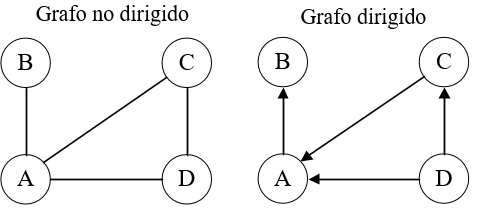

In [175]:
from IPython.display import Image
Image(filename='../Ejemplos-de-un-grafo-dirigido-y-un-grafo-no-dirigido.png') 

Hay varias formas de representar una red. La más común, y la que vamos a usar hoy, es la matriz de adyacencia

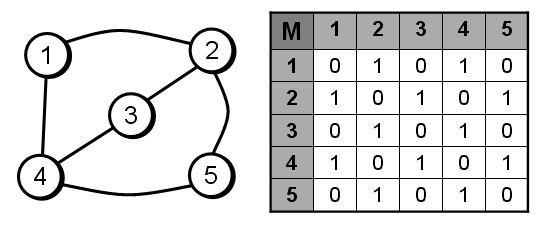

In [176]:
Image(filename='../Matriz_de_adyacencia.jpg') 

### Construcción de la red de coautoría de proyectos de ley en el cuatrenio 2010-2014

In [180]:
#Leer las bases
nodes= pd.read_csv("./nodos_congreso_2010.csv",sep=";",index_col=0)
nodes.index = nodes.index.map(str)
#nodes.autores_id= nodes.autores_id.map(str)
edges=pd.read_csv("./edges_coautoria_2010.csv",sep=";",index_col=0)
edges.index = edges.index.map(str)

In [182]:
edges.head()

4  8   9  10  11  12  13  16  19  20  ...  2819  2842  3255  3256  4966  \
4   22  0   0   3   1   5   3   1   1   4  ...     0     2     1     0     0   
8    0  6   0   1   0   1   0   0   1   0  ...     0     0     0     0     0   
9    0  0  28   2   2   1   2   1   1   2  ...     0     0     0     0     0   
10   3  1   2  29   1   1   4   1   0   0  ...     8     1     0     0     0   
11   1  0   2   1  20   3   4   1   2   1  ...     0     0     0     0     0   

    4993  5479  6042  6057  6099  
4      2     0     0     1     0  
8      3     0     0     0     0  
9      0     0     0     0     0  
10     3     0     0     0     0  
11     0     0     0     1     0  

[5 rows x 284 columns]

In [181]:
nodes.head()

party                   camara_  \
autores_id                                                     
656         Conservador Colombiano  Camara de representantes   
142                           MIRA  Camara de representantes   
60                            MIRA                    Senado   
98                            MIRA                    Senado   
288                           MIRA                    Senado   

                           partido                   nombre_completo  \
autores_id                                                             
656         Conservador Colombiano            Buenaventura Leon Leon   
142                           MIRA          Gloria Stella Díaz Ortiz   
60                            MIRA        Alexandra Moreno Piraquive   
98                            MIRA  Manuel Antonio Virgüez Piraquive   
288                           MIRA        Carlos Alberto Baéna López   

            genero_id  
autores_id             
656                 1  
142                 2  
60                  2  
98                  1  
288                 1

In [183]:
G = nx.from_pandas_adjacency(edges)

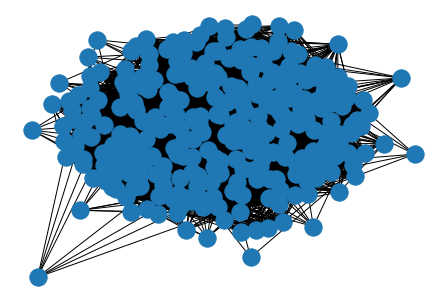

In [186]:
 nx.draw(G, pos=nx.kamada_kawai_layout(G))

In [187]:
G.remove_edges_from(G.selfloop_edges())

In [188]:
for edge in G.edges():
    G[edge[0]][edge[1]]["weight"] = edges[edge[0]][edge[1]]

In [189]:
G.edges[('4', '10')]

{'weight': 3}

In [190]:
for node in sorted(G.nodes()):
    G.node[node]['Nombre'] = nodes["nombre_completo"][node]
    G.node[node]['Género'] = nodes["genero_id"][node]
    G.node[node]['Cámara'] = nodes["camara_"][node]
    G.node[node]['Partido'] = nodes["partido"][node]

In [191]:
G.node["4"]

{'Nombre': 'Hernán Francisco Andrade Serrano',
 'Género': 1,
 'Cámara': 'Senado',
 'Partido': 'Conservador Colombiano'}

In [192]:
G = nx.relabel_nodes(G,nodes["nombre_completo"])

In [193]:
G.edges[('4', '10')]

KeyError: '4'

In [195]:
G.edges[('Hernán Francisco Andrade Serrano', 'Luis Carlos Avellaneda Tarazona')]

{'weight': 3}

### Caracterización de la red:

In [196]:
print('La red tiene ',G.number_of_nodes(),'nodos y ',G.number_of_edges(), "arcos")

La red tiene  284 nodos y  11025 arcos


**Densidad de la red:** Proporción del número de lazos presentes en la red sobre el número máximo posible.

In [197]:
print('La densidad de la red es',nx.density(G))

La densidad de la red es 0.2743492758672174


**Número de componentes:** Número de subrafos en una red.

In [198]:
nx.number_connected_components(G)

5

In [199]:
[len(c) for c in nx.connected_components(G)]

[280, 1, 1, 1, 1]

In [200]:
giant = max(nx.connected_component_subgraphs(G), key=len)

### Caracterización de los nodos de la red:

**Centralidad de grado:** Número de conexiones que tiene un nodo. Para este caso...

In [204]:
grado=G.degree()
grado_orden=sorted(grado,key=operator.itemgetter(1),reverse=True)
print('Los nodos más conectados son:',grado_orden[0:5])


Los nodos más conectados son: [('Heriberto Sanabria Astudillo', 170), ('Karime Mota y Morad', 159), ('Orlando Velandia Sepulveda', 159), ('Juan Valdes', 159), ('Mario Suarez Florez', 158)]


**Grado con peso (weighted degree):** Número de conexiones que tiene un nodo ponderado por el peso de la relación. Para este caso, número de proyectos de ley en los que un autor fue coautor

In [206]:
grado=sorted(G.degree(weight="weight"),key=operator.itemgetter(1),reverse=True)
print('Los nodos más conectados son:',grado[0:5])

Los nodos más conectados son: [('Gloria Stella Díaz Ortiz', 374), ('Carlos Alberto Baéna López', 367), ('Gloria Ines Ramirez Rios', 329), ('Alexandra Moreno Piraquive', 323), ('Hugo Orlando Velasquez Jaramillo', 319)]


**Eigenvector centrality:** Número de conexiones que tiene un nodo ponderado por el número de conexiones de sus conexiones (iterativo).

In [217]:
eigenvector=nx.eigenvector_centrality(G, max_iter=100, weight='weight')
eigenvector_orden=sorted(eigenvector,key=operator.itemgetter(1),reverse=True)
print('Los nodos con mayor centralidad de vector propio son:',eigenvector_orden[0:5])



Los nodos con mayor centralidad de vector propio son: ['Myriam Alicia Paredes Aguirre', 'Iván Darío Agudelo Zapata', 'Ivan Dario Sandoval Perilla', 'Iván Cepeda Castro', 'Iván Leonidas Name Vásquez']


**Closeness centrality:** Valor de 0 a 1 que representa la distancia de un nodo inicial a los demás nodos de la red 

In [220]:
closeness={k: v for k, v in nx.closeness_centrality(giant).items() if isinstance(v, float)}
sorted_closeness =sorted(closeness.items(), key=lambda kv: kv[1],reverse=True)
sorted_closeness[0:5]

[('Heriberto Sanabria Astudillo', 0.7190721649484536),
 ('Karime Mota y Morad', 0.6992481203007519),
 ('Orlando Velandia Sepulveda', 0.6992481203007519),
 ('Juan Valdes', 0.6992481203007519),
 ('Mario Suarez Florez', 0.6975)]

**Betweeness centrality:** Valor de 0 a 1 que representa cuántas veces un nodo se encuentra en el camino más corto entre dos nodos.

In [221]:
betweeness={k: v for k, v in nx.betweenness_centrality(G).items() if isinstance(v, float)}
sorted_betweenness =sorted(betweeness.items(), key=lambda kv: kv[1],reverse=True)
sorted_betweenness[0:5]

[('Heriberto Sanabria Astudillo', 0.014700161251455564),
 ('Mario Suarez Florez', 0.01201009507577487),
 ('Orlando Velandia Sepulveda', 0.010552041206666021),
 ('Juan Valdes', 0.010425539952543748),
 ('Jorge Eliecer Gomez Villamizar', 0.00939088939558696)]

#### De todas las medidas se pueden sacar estadísticas:

In [224]:
import numpy as np
np.mean(list(dict(G.degree()).values()))
np.mean(list(dict(G.degree(weight="weight")).values()))

119.01408450704226

In [226]:
nx.write_graphml(G, "./coautoría_2010.graphml")